In [1]:
# Dependencies
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
import pandas as pd
import os
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import numpy as np

In [2]:
# Load in data
df = pd.read_csv('data_sets/juniors_data.csv')
df.head()

,LEAGUE,PLAYER_ID,POSITION,SEASON,AGE_SEPT_15,GP,G,A,TP,PPG,...,SEASON_>20GP,CUM_GP,ONLY_1_SEASON,MIN_3_SEASONS,DY_STATUS,SHOOTS,DRAFTED,NHL_PPG,NHL_GP,NHL_DV
0,WHL,100056/tye-hand,D,2013,18.252778,31,0,2,2,0.060000,...,1,31,1,0,DY,L,No,0.0,0,0
1,OHL,100141/sean-thompson,F,2004,20.625000,38,6,5,11,0.289474,...,3,137,0,1,DY+2,L,No,0.0,0,0
2,USHL,100151/stanislav-dzakhov,F,2013,20.497222,22,3,3,6,0.272727,...,2,66,0,0,DY+2,R,No,0.0,0,0
3,QMJHL,100165/owen-bennington,F,2015,20.444444,66,2,2,4,0.060000,...,2,125,0,0,DY+2,R,No,0.0,0,0
4,QMJHL,100224/tomas-pavelka,D,2013,20.294444,56,8,31,39,0.696429,...,2,123,0,0,DY+2,L,No,0.0,0,0


In [3]:
# dropping non-numeric columns
df = df.drop(['PLAYER_ID','SEASON','DY_STATUS','SHOOTS','NHL_DV','NHL_GP','SHOOTS','NHL_PPG'], axis=1)
df.head()

,LEAGUE,POSITION,AGE_SEPT_15,GP,G,A,TP,PPG,SEASON_NO,SEASON_>20GP,CUM_GP,ONLY_1_SEASON,MIN_3_SEASONS,DRAFTED
0,WHL,D,18.252778,31,0,2,2,0.060000,1,1,31,1,0,No
1,OHL,F,20.625000,38,6,5,11,0.289474,3,3,137,0,1,No
2,USHL,F,20.497222,22,3,3,6,0.272727,2,2,66,0,0,No
3,QMJHL,F,20.444444,66,2,2,4,0.060000,2,2,125,0,0,No
4,QMJHL,D,20.294444,56,8,31,39,0.696429,2,2,123,0,0,No


In [15]:
# Function to convert League from string into int
def league_int(x):
    if x.LEAGUE == 'WHL':
        return 0
    elif x.LEAGUE == 'QMJHL':
        return 1
    elif x.LEAGUE == 'OHL':
        return 2
    elif x.LEAGUE == 'USHL':
        return 3
    return 4

In [16]:
#apply funct to set and show headto see league is now int
df['LEAGUE'] = df.apply(league_int, axis=1)
df.head()

,LEAGUE,POSITION,AGE_SEPT_15,GP,G,A,TP,PPG,SEASON_NO,SEASON_>20GP,CUM_GP,ONLY_1_SEASON,MIN_3_SEASONS,DRAFTED
0,4,1,18.252778,31,0,2,2,0.060000,1,1,31,1,0,No
1,4,0,20.625000,38,6,5,11,0.289474,3,3,137,0,1,No
2,4,0,20.497222,22,3,3,6,0.272727,2,2,66,0,0,No
3,4,0,20.444444,66,2,2,4,0.060000,2,2,125,0,0,No
4,4,1,20.294444,56,8,31,39,0.696429,2,2,123,0,0,No


In [25]:
# Create a function to coonvert position string to int
def position_int(x):
    if x.POSITION == 'F':
        return 0
    elif x.POSITION == 'D':
        return 1
    return 2

In [26]:
# Apply position conversion function adn display head to show it worked properly
df['POSITION'] = df.apply(position_int, axis=1)
df.head()

,LEAGUE,POSITION,AGE_SEPT_15,GP,G,A,TP,PPG,SEASON_NO,SEASON_>20GP,CUM_GP,ONLY_1_SEASON,MIN_3_SEASONS,DRAFTED
0,4,2,18.252778,31,0,2,2,0.060000,1,1,31,1,0,No
1,4,2,20.625000,38,6,5,11,0.289474,3,3,137,0,1,No
2,4,2,20.497222,22,3,3,6,0.272727,2,2,66,0,0,No
3,4,2,20.444444,66,2,2,4,0.060000,2,2,125,0,0,No
4,4,2,20.294444,56,8,31,39,0.696429,2,2,123,0,0,No


In [43]:
# # Create a function to coonvert Drafted string to int
# def drafted_int(x):
#     if x.DRAFTED == 'No':
#         return 0
#     elif x.DRAFTED == 'Yes':
#         return 1

In [44]:
# # Apply position conversion function adn display head to show it worked properly
# df['DRAFTED'] = df.apply(position_int, axis=1)
# df.head()

,LEAGUE,POSITION,AGE_SEPT_15,GP,G,A,TP,PPG,SEASON_NO,SEASON_>20GP,CUM_GP,ONLY_1_SEASON,MIN_3_SEASONS,DRAFTED
0,0.0,1,18.252778,31,0,2,2,0.060000,1,1,31,1,0,None
1,2.0,0,20.625000,38,6,5,11,0.289474,3,3,137,0,1,None
2,3.0,0,20.497222,22,3,3,6,0.272727,2,2,66,0,0,None
3,1.0,0,20.444444,66,2,2,4,0.060000,2,2,125,0,0,None
4,1.0,1,20.294444,56,8,31,39,0.696429,2,2,123,0,0,None


In [27]:
# split into inputs and outputs
outcomes = df['DRAFTED']
outcomes.head()

input_factors = df.drop(['DRAFTED'], axis = 1)
input_factors.head()

,LEAGUE,POSITION,AGE_SEPT_15,GP,G,A,TP,PPG,SEASON_NO,SEASON_>20GP,CUM_GP,ONLY_1_SEASON,MIN_3_SEASONS
0,4,2,18.252778,31,0,2,2,0.060000,1,1,31,1,0
1,4,2,20.625000,38,6,5,11,0.289474,3,3,137,0,1
2,4,2,20.497222,22,3,3,6,0.272727,2,2,66,0,0
3,4,2,20.444444,66,2,2,4,0.060000,2,2,125,0,0
4,4,2,20.294444,56,8,31,39,0.696429,2,2,123,0,0


In [28]:
# split outcomes into independent Df
outcomes = df['DRAFTED']
outcomes.head()

0    No
1    No
2    No
3    No
4    No
Name: DRAFTED, dtype: object

In [29]:
# Train/test Split
input_train, input_test, output_train, output_test = train_test_split(input_factors, outcomes, random_state=42, 
                                                                      stratify=outcomes)

In [30]:
from sklearn.preprocessing import StandardScaler

# Create a StandardScater model and fit it to the training data

input_scaler = StandardScaler().fit(input_train.values.reshape(-1, 1))

In [31]:
# Transform the training and testing data using the X_scaler and y_scaler models

input_train_scaled = input_scaler.transform(input_train)
input_test_scaled = input_scaler.transform(input_test)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  This is separate from the ipykernel package so we can avoid doing imports until
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  after removing the cwd from sys.path.


In [32]:
# Test for Nan
pd.isnull(input_train).sum() > 0

LEAGUE           False
POSITION         False
AGE_SEPT_15      False
GP               False
G                False
A                False
TP               False
PPG              False
SEASON_NO        False
SEASON_>20GP     False
CUM_GP           False
ONLY_1_SEASON    False
MIN_3_SEASONS    False
dtype: bool

k: 1, Train/Test Score: 1.000/0.758
k: 3, Train/Test Score: 0.878/0.797
k: 5, Train/Test Score: 0.855/0.807
k: 7, Train/Test Score: 0.846/0.817
k: 9, Train/Test Score: 0.840/0.817
k: 11, Train/Test Score: 0.838/0.816
k: 13, Train/Test Score: 0.836/0.821
k: 15, Train/Test Score: 0.835/0.822
k: 17, Train/Test Score: 0.833/0.825
k: 19, Train/Test Score: 0.833/0.827
k: 21, Train/Test Score: 0.834/0.825
k: 23, Train/Test Score: 0.832/0.822


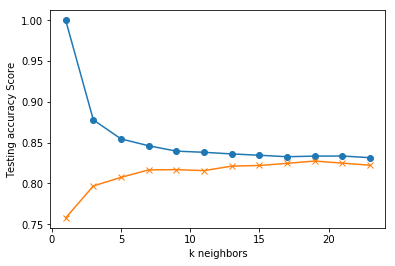

In [35]:

# Loop through different k values to see which has the highest accuracy
# Note: We only use odd numbers because we don't want any ties
train_scores = []
test_scores = []
for k in range(1, 25, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(input_train_scaled, output_train)
    train_score = knn.score(input_train_scaled, output_train)
    test_score = knn.score(input_test_scaled, output_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")
    
    
plt.plot(range(1, 25, 2), train_scores, marker='o')
plt.plot(range(1, 25, 2), test_scores, marker="x")
plt.xlabel("k neighbors")
plt.ylabel("Testing accuracy Score")
plt.show()